Welcome to the Yemisi Shyllon Museum 
Enter your email:  @
Enter your age:  88



✅ Email and age validated successfully!
Choose a genre or type 'exit' to cancel:


1. Contemporary
2. Modern
3. Traditional
 modern



🎨 Which artwork would you like to enhance?
1. Dancer
2. Masks
3. Unknown


Enter the artwork name:  masks


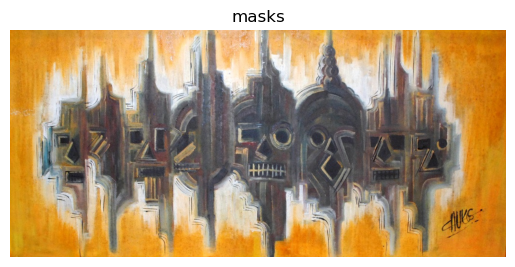


Would you like to apply a transformation?
1. Translation
2. Reflection
3. Rotation
4. Cropping
5. Shear (X or Y)
6. Blurring
7. Exit


Enter your choice:  blurring
Enter kernel size (odd number):  7


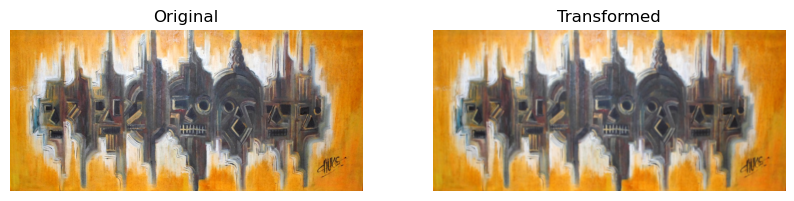


✅ Email and age validated successfully!
Choose a genre or type 'exit' to cancel:


1. Contemporary
2. Modern
3. Traditional
 traditional



🎨 Which artwork would you like to enhance?
1. Benin
2. Gelede
3. Unknown


Enter the artwork name:  benin


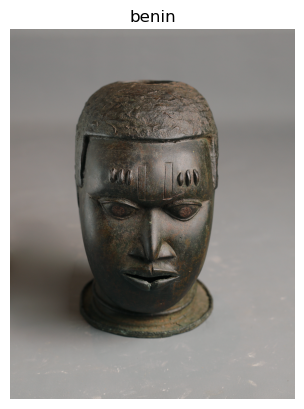


Would you like to apply a transformation?
1. Translation
2. Reflection
3. Rotation
4. Cropping
5. Shear (X or Y)
6. Blurring
7. Exit


Enter your choice:  reflection


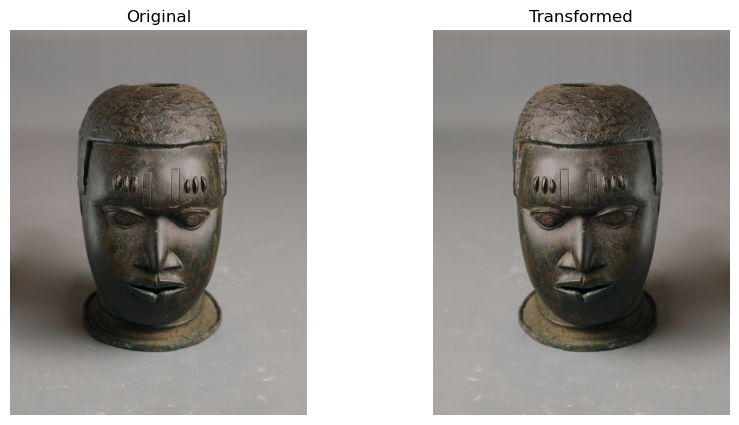


✅ Email and age validated successfully!
Choose a genre or type 'exit' to cancel:


1. Contemporary
2. Modern
3. Traditional
 exit


Goodbye!


In [34]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the image categories and their file paths
genres = {
    "contemporary": {"images": {
        "common": "images/contemporary/common.jpg",
        "hybrid": "images/contemporary/hybrid.jpg",
        "untitled": "images/contemporary/untitled.jpg"
    }},
    "modern": {"images": {
        "dancer": "images/modern/dancer.jpg",
        "masks": "images/modern/masks.jpg",
        "unknown": "images/modern/unknown.jpg"
    }},
    "traditional": {"images": {
        "benin": "images/traditional/benin.jpg",
        "gelede": "images/traditional/gelede.jpg",
        "unknown": "images/traditional/unknown.jpg"
    }}
}

# Function to select an image
def categories_selection(choice1):
    choice1 = choice1.lower()
    if choice1 not in genres:
        print("❌ Invalid genre selection! Please choose from Contemporary, Modern, or Traditional.")
        return None, None

    print("\n🎨 Which artwork would you like to enhance?")
    for i, img_name in enumerate(genres[choice1]["images"].keys(), start=1):
        print(f"{i}. {img_name.capitalize()}")

    choice2 = input("Enter the artwork name: ").strip().lower()

    if choice2 not in genres[choice1]["images"]:
        print("❌ Invalid artwork choice.")
        return None, None

    image_path = genres[choice1]["images"][choice2]

    if not os.path.exists(image_path):
        print(f"❌ Image not found at: {image_path}")
        return None, None

    return image_path, choice2  # Return the image path and name

# Function to display an image
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to apply transformations
def transformation_techniques(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    if image is None:
        print("❌ Failed to load image.")
        return
    
    print("\nWould you like to apply a transformation?")
    print("1. Translation\n2. Reflection\n3. Rotation\n4. Cropping\n5. Shear (X or Y)\n6. Blurring\n7. Exit")

    choice = input("Enter your choice: ").strip().lower()

    if choice == "1" or choice == "translation":
        x = int(input("Enter X translation: "))
        y = int(input("Enter Y translation: "))
        M = np.float32([[1, 0, x], [0, 1, y]])
        transformed_img = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

    elif choice == "2" or choice == "reflection":
        transformed_img = cv2.flip(image, 1)  # 1 = horizontal flip

    elif choice == "3" or choice == "rotation":
        angle = int(input("Enter rotation angle: "))
        center = (image.shape[1] // 2, image.shape[0] // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        transformed_img = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

    elif choice == "4" or choice == "cropping":
        x1 = int(input("Enter x1: "))
        x2 = int(input("Enter x2: "))
        y1 = int(input("Enter y1: "))
        y2 = int(input("Enter y2: "))
        transformed_img = image[y1:y2, x1:x2]

    elif choice == "5" or choice.startswith("shear"):
        shear_factor = float(input("Enter shear factor: "))
        M = np.float32([[1, shear_factor, 0], [shear_factor, 1, 0]])
        transformed_img = cv2.warpAffine(image, M, (int(image.shape[1] * 1.5), int(image.shape[0] * 1.5)))

    elif choice == "6" or choice == "blurring":
        ksize = int(input("Enter kernel size (odd number): "))
        if ksize % 2 == 0:
            print("Kernel size must be an odd number.")
            return
        transformed_img = cv2.GaussianBlur(image, (ksize, ksize), 0)

    elif choice == "7" or choice == "exit":
        print("Exiting transformations.")
        return

    else:
        print("❌ Invalid choice.")
        return

    # Display both original and transformed images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))
    plt.title("Transformed")
    plt.axis('off')

    plt.show()

# Main function to process the image
def process_image():
    while True:
        email = input("Welcome to the Yemisi Shyllon Museum \nEnter your email: ").strip().lower()
        if "@" not in email or email.count("@") != 1:
            print("❌ Invalid email. Please enter a valid email.")
        else:
            break
    
    while True:
        age = input("Enter your age: ").strip()
        if not age.isdigit():
            print("❌ Invalid input! Please enter a numeric value.")
        elif int(age) < 19:
            print("❌ You must be older than 18 years old.")
        else:
            break

    while True:
        print("\n✅ Email and age validated successfully!\nChoose a genre or type 'exit' to cancel:")
        choice1 = input("1. Contemporary\n2. Modern\n3. Traditional\n").strip().capitalize()

        if choice1 == "Exit":
            print("Goodbye!")
            break

        image_path, image_name = categories_selection(choice1)
        
        if image_path:
            display_image(cv2.imread(image_path), image_name)
            transformation_techniques(image_path)

process_image()


In [30]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\Stephanie Ugbe\sugbeCSC418\Week_3
